# Superstore Sales: Temporal Analysis

In [50]:
import dotenv
from sqlalchemy import create_engine
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.arima_model import ARIMA

In [41]:
# TODO 1: Replace current method of URL object creation with secure .env files, adding to .gitignore.

In [42]:
with open("data/authInfo.txt") as file:
    id = file.read()

# Create SQLAlchemy engine obj to act as conn
url = "mysql://{}/superstore".format(id)
engine = create_engine(url)

### II. Monthly Analysis

In [43]:
monthly_df = pd.read_sql_table(table_name="monthly_financials", con=engine.connect())
monthly_df.head(10)

,YearMonth,OrderVolume,MonthlySales,DiscountsValueGiven,MonthlyProfit
0,2014-01,79,14236.89,697.96,2450.19
1,2014-02,46,4519.89,191.79,862.31
2,2014-03,157,55691.01,16953.68,498.73
3,2014-04,135,28295.34,3038.66,3488.84
4,2014-05,122,23648.29,4234.37,2738.71
5,2014-06,135,34595.13,4447.32,4976.52
6,2014-07,143,33946.39,5311.25,-841.48
7,2014-08,153,27909.47,3412.60,5318.10
8,2014-09,268,81777.35,14019.81,8328.10
9,2014-10,159,31453.39,4030.99,3448.26


In [44]:
px.line(data_frame=monthly_df, x="YearMonth", y=["MonthlySales", "MonthlyProfit"], title="Time Series for Sales and Profit")

In [56]:
px.box(data_frame=monthly_df, x='MonthlyProfit')

In [45]:
monthly_df.describe()

,OrderVolume,MonthlySales,DiscountsValueGiven,MonthlyProfit
count,48.000000,48.000000,48.000000,48.000000
mean,208.208333,47858.351042,6720.460833,5966.605417
std,104.724148,25195.891228,4127.272053,4288.699326
min,46.000000,4519.890000,191.790000,-3281.010000
25%,139.500000,29790.097500,4068.197500,2939.562500
50%,173.000000,39803.245000,5439.625000,4990.550000
75%,270.500000,65833.345000,9471.542500,8742.505000
max,462.000000,118447.830000,18779.050000,17885.310000


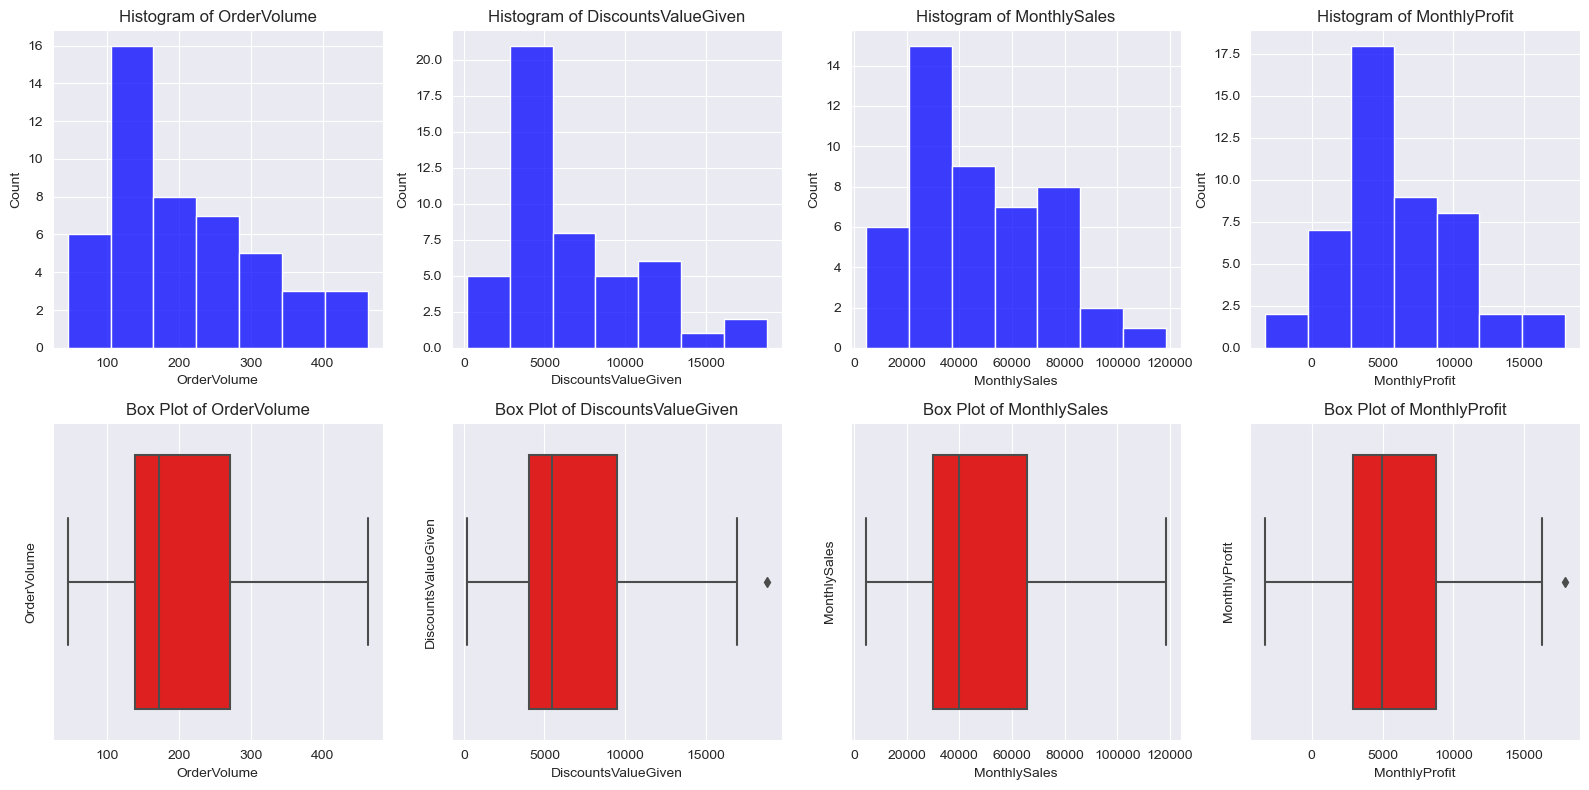

In [46]:
monthly_cols = ['OrderVolume', 'DiscountsValueGiven', 'MonthlySales', 'MonthlyProfit']

# Create 2 x 4 subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Create histograms in the first row
for i, col in enumerate(monthly_cols):
    sns.histplot(monthly_df[col], ax=axes[0, i], color='blue')
    axes[0, i].set_title(f'Histogram of {col}')
    axes[0, i].set_xlabel(col)

# Create box plots in the second row
for i, col in enumerate(monthly_cols):
    sns.boxplot(data=monthly_df, x=col, ax=axes[1, i], color='red')
    axes[1, i].set_title(f'Box Plot of {col}')
    axes[1, i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [47]:
# Shapiro-Wilk test for normality of the variables within monthly_df
print("Normal Variables:")
for label in monthly_cols:
    _, p = st.shapiro(monthly_df[label])
    if p > .05:
        print('\t * "{}"'.format(label))

Normal Variables:
	 * "MonthlySales"
	 * "MonthlyProfit"


In [47]:
monthly_df['']